In [186]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [187]:
import numpy as np
import pandas as pd

In [188]:
import datetime as dt

In [189]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [190]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [191]:
#Reflect an existing databse into a new model
Base = automap_base()

#reflect tables
Base.prepare(engine, reflect = True)

In [192]:
#View all classes
Base.classes.keys()

['measurement', 'station']

In [193]:
#Save a reference for each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [194]:
#create a session
session = Session(engine)

In [195]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
query = (session.query(Measurement.prcp,Measurement.date).
        filter(Measurement.date >='2016-08-23', Measurement.date <= '2017-08-23')
        .order_by(Measurement.date).statement
       )
#Create Dataframe from query
df = pd.read_sql(query,session.bind).dropna()
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
df.set_index('date')


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28


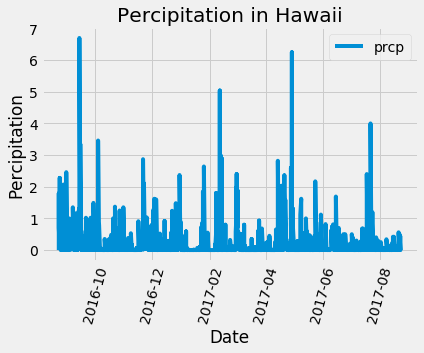

In [196]:
#Plot data
dates = pd.to_datetime(df['date'])
percipitation = df['prcp']
plt.plot(dates,percipitation)
plt.xticks(rotation = '75')
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.title("Percipitation in Hawaii")
plt.legend()
plt.savefig('Percipitation_Hawaii.png')
plt.show()

In [197]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [198]:
# Design a query to show how many stations are available in this dataset?
station_query = (session.query(Station.station))
station_query.count()

9

In [260]:
#* Design a query to find the most active stations.


# * List the stations and observation counts in descending order.
active = engine.execute("SELECT station,COUNT (station) FROM measurement GROUP BY station order by count(station) DESC").fetchall()
active
 # * Which station has the highest number of observations?
station_id = active[0][0]
station_name = session.query(Station.name).filter(Station.station==active[0][0]).all()
print(f'The highest number of observations come from{station_name[0][0]}')
#* Design a query to retrieve the last 12 months of temperature observation data (tobs).

#  * Filter by the station with the highest number of observations.

 # * Plot the results as a histogram with `bins=12`.

       station  count_1
0  USC00511918     1979
1  USC00513117     2709
2  USC00514830     2202
3  USC00516128     2612
4  USC00517948     1372
5  USC00518838      511
6  USC00519281     2772
7  USC00519397     2724
8  USC00519523     2669
The highest number of observations come fromWAIHEE 837.5, HI US


In [282]:
#* Design a query to retrieve the last 12 months of temperature observation data (tobs).
temp_query = (session.query(Measurement.tobs,Measurement.station,Measurement.date)
              .filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23')
              .filter(Measurement.station == station_id)
              .order_by(Measurement.date)
              .statement)

#  * Filter by the station with the highest number of observations.
temp_df = pd.read_sql(temp_query, session.bind).dropna()
temp_df

,tobs,station,date
0,77.0,USC00519281,2016-08-23
1,77.0,USC00519281,2016-08-24
2,80.0,USC00519281,2016-08-25
3,80.0,USC00519281,2016-08-26
4,75.0,USC00519281,2016-08-27
5,73.0,USC00519281,2016-08-28
6,78.0,USC00519281,2016-08-29
7,77.0,USC00519281,2016-08-30
8,78.0,USC00519281,2016-08-31
9,80.0,USC00519281,2016-09-01


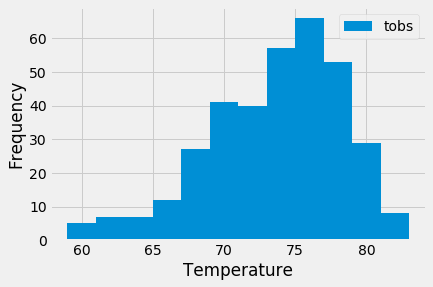

In [293]:
plt.hist(temp_df['tobs'], bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

In [335]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

temp_calc = calc_temps('2017-06-12', '2018-06-12')

#remove values from list
temps = temp_calc[0]

#unpack tuple
(temp_min,temp_avg,temp_max) = temps

69.0

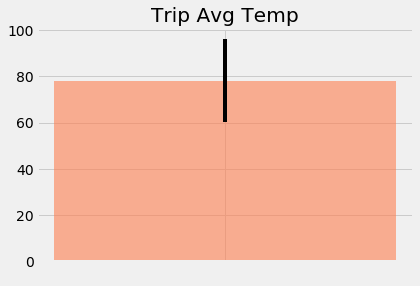

<Figure size 216x432 with 0 Axes>

In [402]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#print(temp_avg)
error = temp_max - temp_min
fig, ax = plt.subplots()
ax.bar(' ', temp_avg, color = 'coral', yerr = error, align ='center', ecolor='black',width = 0.01, alpha = 0.6)
ax.set_title('Trip Avg Temp')
plt.figure(figsize = [3,6])
plt.savefig('trip_avg_temp.png')
plt.show()

In [411]:
# Create App
from flask import Flask, jsonify

In [413]:

#setup flask
app = Flask(__name__)

#create route
@app.route("/")

def climate_app():
    return(
    f"Available Routes:<br/>"
    f"/api/v1.0/precipitation<br/>"
    f"/api/v1.0/stations"
    f"/api/v1.0/tobs<br/>"
    f"/api/v1.0/<start>"
    f"/api/v1.0/<end>"
    )

@app.route(f"/api/v1.0/precipitation")
def prcp():
    #query percipitations
    data = session.query()
    percipitation = []
    
    
if __name__ == "__main__":
    app.run(debug=True)

SyntaxError: invalid syntax (<ipython-input-413-e0c2734a6aaa>, line 21)